# Logistic Regression Model

Approach: Predict the probability of a player being drafted, and rank all players by it - Then select the top 60.

IMPORTANT: PROBLEM! The DraftedPlayers dataset is unjoinable with the features dataset :(. Only thing we can do is run based on 'pick' feature from original dataframe. Which is not as precise as the second dataset

In [1]:
import pandas as pd
import numpy as np

In [131]:
## Players features dataset
features_df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')

drafted_df = pd.read_excel('data/DraftedPlayers2009-2021.xlsx')
drafted_df.columns = ['player_name','team','affiliation','year','round','round_1_pick','overall_pick']
drafted_df = drafted_df.drop(0, axis=0)

C:\Users\giorg\AppData\Local\Temp\ipykernel_1472\2767881670.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')


In [132]:
df = pd.merge(features_df, drafted_df, on=['player_name','year'], how='left')

In [140]:
df['round'] = np.where(df['pick'].isnull()==False, df['round'], 0)
df['round_1_pick'] = np.where(df['pick'].isnull()==False, df['round_1_pick'], 0)
df['overall_pick'] = np.where(df['pick'].isnull()==False, df['overall_pick'], 0)

In [143]:
len(df[df['round']>0])

587

In [145]:
df.head()

,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,team_y,affiliation,round,round_1_pick,overall_pick
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,0,0,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,0,0,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,0.4815,0.0000,12.1852,NaN,10.92680,NaN,NaN,0,0,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,0.5667,0.1333,4.9333,NaN,6.77427,NaN,NaN,0,0,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,0.4545,0.3333,7.5758,NaN,0.00000,NaN,NaN,0,0,0


**Data Processing**

The following is a naive approach to data preprocessing. Needs to be improved

In [508]:
df['pick'] = df['pick'].fillna(0)

df = df[df['pick']<=30]

df['first_round_drafted'] = np.where((df['pick']<=30) & (df['pick']>0), 1, 0)

df = df.drop('pick', axis=1)

C:\Users\giorg\AppData\Local\Temp\ipykernel_1404\2483330296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_round_drafted'] = np.where((df['pick']<=30) & (df['pick']>0), 1, 0)


In [509]:
df.first_round_drafted.value_counts()

0    59626
1      623
Name: first_round_drafted, dtype: int64

**Handling Missing Values**

For now, we will drop all columns with missing values. We will need to evaluate filling strategies. The columns are the following:

In [510]:
missing_cols = df.columns[df.isnull().any()].tolist()

missing_count = df[missing_cols].isnull().sum()


missing_df = pd.DataFrame({'Column': missing_cols, 'Missing Count': missing_count})

missing_df = missing_df.sort_values('Missing Count', ascending=False)
missing_df.drop('Column', axis=1, inplace=True)
missing_df['Imputation Strategy'] = ''

markdown_table = missing_df.to_markdown()

|                                 |   Missing Count | Imputation Strategy   |
|:--------------------------------|----------------:|:----------------------|
| Rec Rank                        |           42467 |                       |
| dunksmade/(dunksmade+dunksmiss) |           33380 |                       |
| midmade/(midmade+midmiss)       |           10311 |                       |
| rimmade/(rimmade+rimmiss)       |           10035 |                       |
| rimmade                         |            6255 |                       |
| rimmade+rimmiss                 |            6255 |                       |
| midmade                         |            6255 |                       |
| midmade+midmiss                 |            6255 |                       |
| dunksmade                       |            6255 |                       |
| dunksmiss+dunksmade             |            6255 |                       |
| ast/tov                         |            4726 |                       |
| num                             |            4682 |                       |
| Unnamed: 64                     |            4610 |                       |
| yr                              |             274 |                       |
| ht                              |              86 |                       |
| dbpm                            |              45 |                       |
| dgbpm                           |              45 |                       |
| ogbpm                           |              45 |                       |
| gbpm                            |              45 |                       |
| stops                           |              45 |                       |
| obpm                            |              45 |                       |
| bpm                             |              45 |                       |
| dporpag                         |              45 |                       |
| adrtg                           |              45 |                       |
| drtg                            |              45 |                       |
| Unnamed: 65                     |              45 |                       |
| mp                              |              38 |                       |
| oreb                            |              38 |                       |
| dreb                            |              38 |                       |
| treb                            |              38 |                       |
| ast                             |              38 |                       |
| stl                             |              38 |                       |
| blk                             |              38 |                       |
| pts                             |              38 |                       |

In [511]:
## For now, we will drop all columns with more than 100 missing values
df_no_year = df.drop('year', axis=1)
df_no_year = df_no_year.dropna(axis=1)

df = pd.concat([df_no_year, df['year']], axis=1)

**Categorical Variables**

In [512]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('year')

## Categorical variables
categorical_variables = []
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"{i}: {df[i].dtype}")
        categorical_variables.append(i)

player_name: object
team: object
conf: object
type: object


- Player name can be disregarded
- Team and conf can be OneHot Encoded
- Type is the same for all, can be disregarded

In [513]:
df = df.drop(['player_name','type'], axis=1)

In [514]:
# One-hot encoding
df = pd.get_dummies(df, columns=['team', 'conf'], drop_first=True) 

In [515]:
df_2021 = df[df['year']==2021]
df = df[df['year']!=2021]

df_2021 = df_2021.drop('year', axis=1)
df = df.drop('year', axis=1)

In [518]:
print(df_2021.shape)
print(df.shape)

(4946, 423)
(55303, 423)


## Log Regression Model 1

Approach: Balance the classes by removing a lot of data

In [422]:
not_picked_df = df[df['first_round_drafted']==0].sample(n=len(df[df['first_round_drafted']==1]))

balanced_df = pd.concat([df[df['first_round_drafted']==1], not_picked_df])

balanced_df.first_round_drafted.value_counts()

1    598
0    598
Name: first_round_drafted, dtype: int64

**Train-Test Split**

In [423]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['first_round_drafted'])

In [424]:
print(len(train_df))
print(len(train_df[train_df['first_round_drafted']==1])/len(train_df))
print(len(test_df))
print(len(test_df[test_df['first_round_drafted']==1])/len(test_df))

956
0.5
240
0.5


Scale features on training set

In [425]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
# Only transform those on test set
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

In [426]:
X_train = train_df.drop(['first_round_drafted'], axis=1).to_numpy()
y_train = train_df['first_round_drafted'].to_numpy()

X_test = test_df.drop(['first_round_drafted'], axis=1).to_numpy()
y_test = test_df['first_round_drafted'].to_numpy()

In [427]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(956, 422)
(956,)
(240, 422)
(240,)


**Logistic Regression**

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [429]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

Evaluation:

In [430]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

pd.DataFrame({'Metric':['Accuracy', 'F1 Score', 'Precision','AUC'], 'Score':[accuracy, f1, precision, auc]})

,Metric,Score
0,Accuracy,0.920833
1,F1 Score,0.918455
2,Precision,0.946903
3,AUC,0.970139


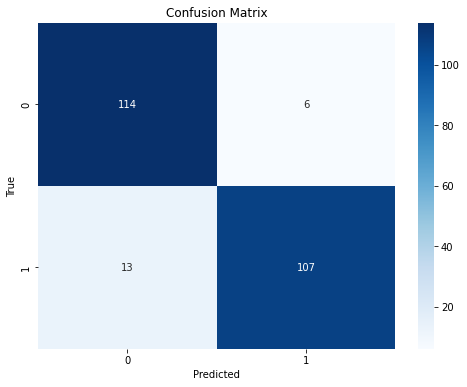

In [431]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

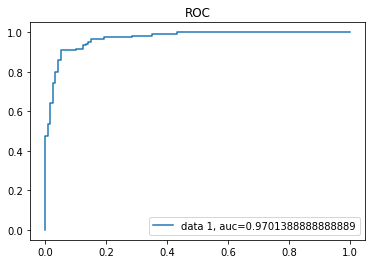

In [432]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC')
plt.show()

**Test with ranking method on 2021 data**

In [439]:
new_test = df_2021

X_new_test, y_new_test = new_test.drop(['first_round_drafted'], axis=1), new_test['first_round_drafted']

X_new_test[numerical_columns] = scaler.transform(X_new_test[numerical_columns])

X_new_test = X_new_test.to_numpy()
y_new_test = y_new_test.to_numpy()

In [447]:
predictions = model.predict(X_new_test)
print(f"Predicted as selected: {sum(predictions)}")

Predicted as selected: 444


In [474]:
y_pred = model.predict(X_new_test)
y_pred_proba = model.predict_proba(X_new_test)[::,1]

accuracy = accuracy_score(y_new_test, predictions)
f1 = f1_score(y_new_test, predictions)
precision = precision_score(y_new_test, predictions)

fpr, tpr, _ = roc_curve(y_new_test, predictions)
auc = roc_auc_score(y_new_test, predictions)

pd.DataFrame({'Metric':['Accuracy', 'F1 Score', 'Precision','AUC'], 'Score':[accuracy, f1, precision, auc]})

,Metric,Score
0,Accuracy,0.914072
1,F1 Score,0.093817
2,Precision,0.049550
3,AUC,0.897123


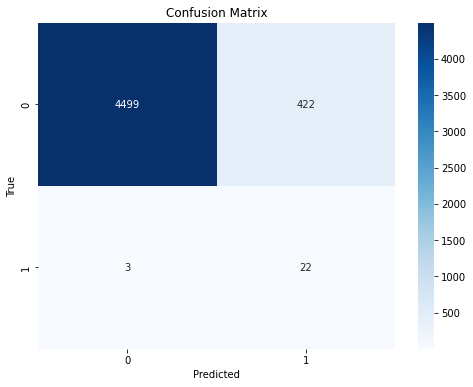

In [476]:
conf_matrix = confusion_matrix(y_new_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Ranking Strategy:

In [468]:
predicted_proba = model.predict_proba(X_new_test)[:,1]

pred_proba_df = pd.DataFrame(predicted_proba)
pred_proba_df.columns = ['pred-prob']

df_2021 = df_2021.reset_index()

merged_df = df_2021.merge(pred_proba_df, left_index=True, right_index=True)

In [469]:
merged_df

,level_0,index,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC,conf_ind,pred-prob
0,0,56091,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,0,0,0,0,0,0,0,0,0,0.000326
1,1,56092,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,0,0,0,0,0,0,0,0,0,0.001072
2,2,56093,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,0,0,0,0,0,0,0,0,0,0.027969
3,3,56094,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,0,0,0,0,0,0,0,0,0,0.011513
4,4,56095,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,0,0,0,0,0,0,0,0,0,0.499708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,4941,61056,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.329642
4942,4942,61057,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,...,0,0,0,0,1,0,0,0,0,0.001981
4943,4943,61058,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000212
4944,4944,61059,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000315


In [470]:
merged_df.first_round_drafted.value_counts()

0    4921
1      25
Name: first_round_drafted, dtype: int64

In [471]:
selected_by_model = merged_df.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

0    25
1     5
Name: first_round_drafted, dtype: int64

It only gets 5 right in the top 30 the model estimates.

##  Model 2: Log Regression without balancing classes

**Train Test Split**

In [519]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['first_round_drafted'])

In [520]:
print(len(train_df))
print(len(train_df[train_df['first_round_drafted']==1])/len(train_df))
print(len(test_df))
print(len(test_df[test_df['first_round_drafted']==1])/len(test_df))

44242
0.010804213191085394
11061
0.010848928668294006


Scale features on training set

In [521]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
# Only transform those on test set
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

In [522]:
X_train = train_df.drop(['first_round_drafted'], axis=1).to_numpy()
y_train = train_df['first_round_drafted'].to_numpy()

X_test = test_df.drop(['first_round_drafted'], axis=1).to_numpy()
y_test = test_df['first_round_drafted'].to_numpy()

In [523]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(44242, 422)
(44242,)
(11061, 422)
(11061,)


**Logistic Regression**

In [524]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [525]:
model = LogisticRegression()

model.fit(X_train, y_train)

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation:

In [526]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

pd.DataFrame({'Metric':['Accuracy', 'F1 Score', 'Precision','AUC'], 'Score':[accuracy, f1, precision, auc]})

,Metric,Score
0,Accuracy,0.991502
1,F1 Score,0.440476
2,Precision,0.770833
3,AUC,0.969110


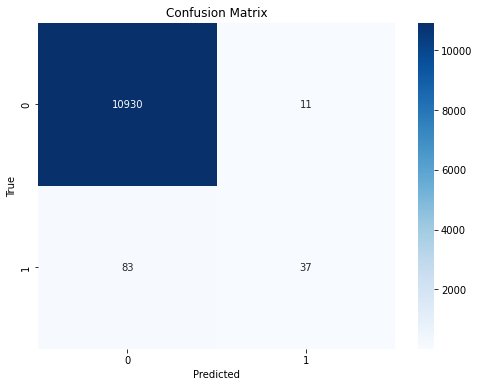

In [527]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

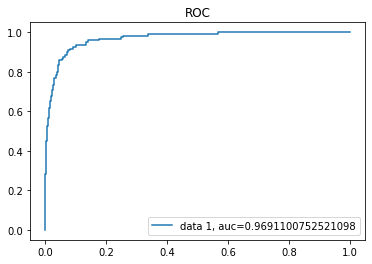

In [528]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC')
plt.show()

**Test with ranking method on 2021 data**

In [529]:
new_test = df_2021

X_new_test, y_new_test = new_test.drop(['first_round_drafted'], axis=1), new_test['first_round_drafted']

X_new_test[numerical_columns] = scaler.transform(X_new_test[numerical_columns])

X_new_test = X_new_test.to_numpy()
y_new_test = y_new_test.to_numpy()

In [530]:
predictions = model.predict(X_new_test)
print(f"Predicted as selected: {sum(predictions)}")

Predicted as selected: 18


In [531]:
y_pred = model.predict(X_new_test)
y_pred_proba = model.predict_proba(X_new_test)[::,1]

accuracy = accuracy_score(y_new_test, predictions)
f1 = f1_score(y_new_test, predictions)
precision = precision_score(y_new_test, predictions)

fpr, tpr, _ = roc_curve(y_new_test, predictions)
auc = roc_auc_score(y_new_test, predictions)

pd.DataFrame({'Metric':['Accuracy', 'F1 Score', 'Precision','AUC'], 'Score':[accuracy, f1, precision, auc]})

,Metric,Score
0,Accuracy,0.993328
1,F1 Score,0.232558
2,Precision,0.277778
3,AUC,0.598679


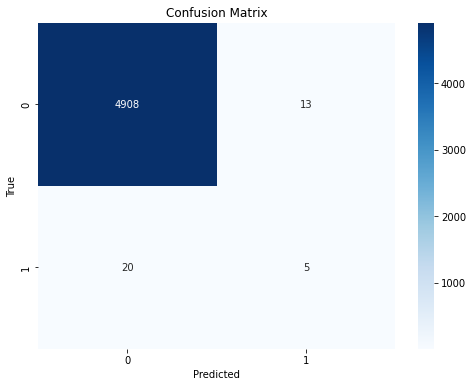

In [532]:
conf_matrix = confusion_matrix(y_new_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Ranking Strategy:

In [533]:
predicted_proba = model.predict_proba(X_new_test)[:,1]

pred_proba_df = pd.DataFrame(predicted_proba)
pred_proba_df.columns = ['pred-prob']

df_2021 = df_2021.reset_index()

merged_df = df_2021.merge(pred_proba_df, left_index=True, right_index=True)

In [535]:
merged_df.first_round_drafted.value_counts()

0    4921
1      25
Name: first_round_drafted, dtype: int64

In [536]:
selected_by_model = merged_df.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

0    22
1     8
Name: first_round_drafted, dtype: int64

It only gets 8 right in the top 30 the model estimates.